# Model Predictions

### In this Notebook we are going to predict different Models

In [1]:
import pandas as pd
import numpy as np
import yaml
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn import linear_model


from sklearn.svm import SVC
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, precision_recall_curve
#from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from sys import path
from os.path import abspath
     
path.insert(0, abspath('../src'))

In [3]:
with open('../params.yaml') as file:
    config = yaml.safe_load(file)

In [4]:
from sys import path
from os.path import abspath
     
path.insert(0, abspath('../src'))

In [5]:
data = pd.read_csv(config['data']['clean'])
data

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
272,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
273,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
274,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [6]:
data.gender.value_counts()

M    142
F    134
Name: gender, dtype: int64

In [7]:
data.lung_cancer.value_counts()

YES    238
NO      38
Name: lung_cancer, dtype: int64

In [8]:
data.columns

Index(['gender', 'age', 'smoking', 'yellow_fingers', 'anxiety',
       'peer_pressure', 'chronic_disease', 'fatigue', 'allergy', 'wheezing',
       'alcohol_consuming', 'coughing', 'shortness_of_breath',
       'swallowing_difficulty', 'chest_pain', 'lung_cancer'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['lung_cancer']=encoder.fit_transform(data['lung_cancer'])
data['gender']=encoder.fit_transform(data['gender'])
data.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
#data = data.rename(columns = {'gender1' : 'gender'})
#data['lung_cancer1'] = data['lung_cancer'].map({'Yes': 1, 'No':0})
#data = data.drop(['lung_cancer'], axis=1)


Changing column values 

In [17]:
con_col = ['age']
cat_col=[]
for i in data.columns:
    if i!='age':
        cat_col.append(i)

### X, y Spit

In [20]:
X=data.drop(['lung_cancer'],axis=1)
y=data['lung_cancer']

In [21]:
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


Oversampling of minority classes for balancing

Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset.

In [25]:
#from imblearn.over_sampling import RandomOverSampler
X_os,y_os=RandomOverSampler().fit_resample(X,y)

### PowerTransformer, StandardScaler and OneHotEncoder

### Train/Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,
                                                 test_size=config['testsplit']['test_size'], random_state=config['testsplit']['random_state'],stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['age']=scaler.fit_transform(X_train[['age']])
X_test['age']=scaler.transform(X_test[['age']])
X_train.head()

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
294,0,-0.252799,0,1,1,0,0,0,0,0,0,1,0,0,0
398,0,0.647442,1,0,1,0,0,1,0,0,0,0,0,0,0
170,0,0.759972,0,0,1,0,1,0,1,1,1,0,0,1,0
374,0,-0.477859,0,0,0,0,0,1,0,0,0,0,1,0,0
160,1,0.647442,1,0,0,1,1,1,1,1,1,1,1,1,1


# Applying Linear Regration Model

In [28]:
#Linear re
model = linear_model.LinearRegression()
model = model.fit(X,y)

print(model.intercept_)
print(model.coef_)

0.026330963220835613
[-0.00663042  0.00181234  0.07017508  0.12626247  0.07347185  0.08247818
  0.11163885  0.15616486  0.14380808  0.05589198  0.19595034  0.10841495
  0.0405739   0.1037005   0.03716486]


In [29]:
model.score(X, y)

0.40475748597493466

In [30]:
model = linear_model.LinearRegression() 
model = model.fit(X_train, y_train)

In [31]:
model.score(X_train, y_train)

0.6583471517818544

In [32]:
model.predict(X_test)

array([ 0.24901105,  0.95825949,  0.40522051, -0.13846352,  0.1089567 ,
        0.93615375, -0.06632845,  0.09877438,  0.06243447,  1.27676071,
        0.68349306,  0.06197018,  0.24322968,  0.16735518,  0.2218582 ,
        1.23226146,  0.78504961,  1.10684979,  0.86217695,  0.10216848,
        0.80300334,  0.1089567 ,  0.04118967,  0.41200873,  0.70589754,
        0.71987794,  0.61648322,  0.2218582 , -0.003713  ,  0.16735518,
        1.11313596,  0.54466923,  0.80279905,  0.89490001,  0.03071899,
        0.40522051,  0.1089567 ,  0.86622947, -0.08201705,  0.16735518,
        0.02843633,  0.79523193,  0.96177359,  0.89008307,  0.10216848,
        0.79018885,  1.3052064 ,  0.88998821,  0.76519969,  1.27749086,
        0.10609356,  0.83775441,  0.1089567 ,  0.25946684,  0.4038125 ,
        0.27624449, -0.003713  , -0.13846352,  0.28369918,  0.81871199,
        0.38684197,  0.4038125 ,  0.81384243,  0.70816452,  0.28369918,
        0.80122681,  0.24322968,  0.28369918,  0.17432298,  0.96

# R2

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))
predicted = model.predict(X_test)
r2 = r2_score(y_test, predicted)
r2

0.5980132542374368

In [36]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predicted)
print(mse)

0.10048958971820304


In [37]:
from sklearn import linear_model
import math

rmse = math.sqrt(mse)
print(rmse)

0.31700093015352976


In [38]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,predicted)
print('MAE: %.3f' % mae)

MAE: 0.241


# Applying Logistic Regration Model

In [43]:
#param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
#log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
#log.fit(X_train,y_train)
logReg = LogisticRegression(max_iter=300, multi_class='multinomial',
                          penalty='l2', random_state=1337,
                          solver='sag')
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=300, multi_class='multinomial', random_state=1337,
                   solver='sag')

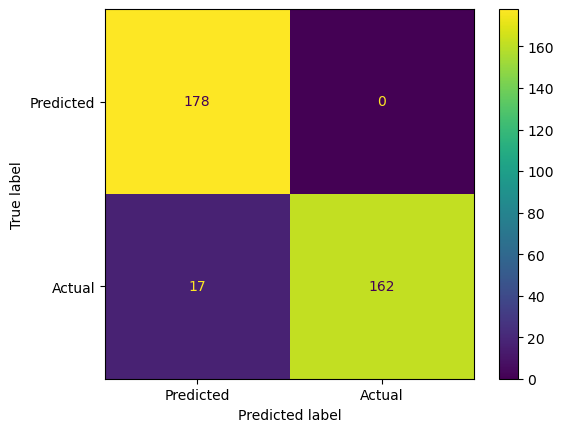

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       178
           1       1.00      0.91      0.95       179

    accuracy                           0.95       357
   macro avg       0.96      0.95      0.95       357
weighted avg       0.96      0.95      0.95       357



In [47]:
y_train_pred = logReg.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(cm, display_labels=['Predicted', 'Actual']).plot()
plt.show()
print(classification_report(y_train, y_train_pred))

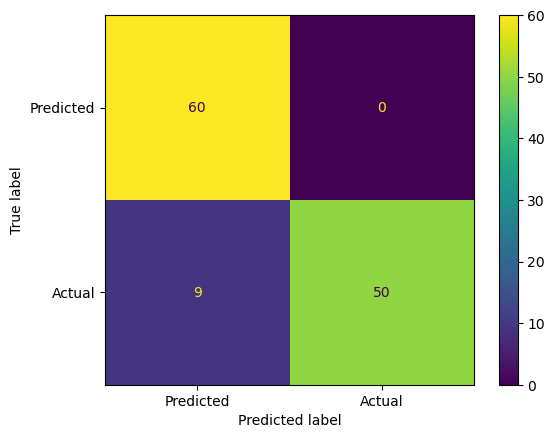

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        60
           1       1.00      0.85      0.92        59

    accuracy                           0.92       119
   macro avg       0.93      0.92      0.92       119
weighted avg       0.93      0.92      0.92       119



In [48]:
y_test_pred = logReg.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm, display_labels=['Predicted', 'Actual']).plot()
plt.show()
print(classification_report(y_test, y_test_pred))

In [49]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_test_pred)

0.8485362749257531

# Applying KNeighbors Classifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=10,
                             weights='distance',
                             algorithm='auto')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

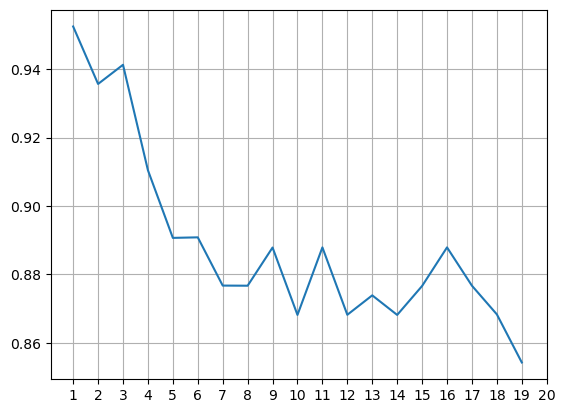

In [55]:
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks = x_ticks, labels=x_labels)
plt.grid()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.90      0.95        59

    accuracy                           0.95       119
   macro avg       0.95      0.95      0.95       119
weighted avg       0.95      0.95      0.95       119



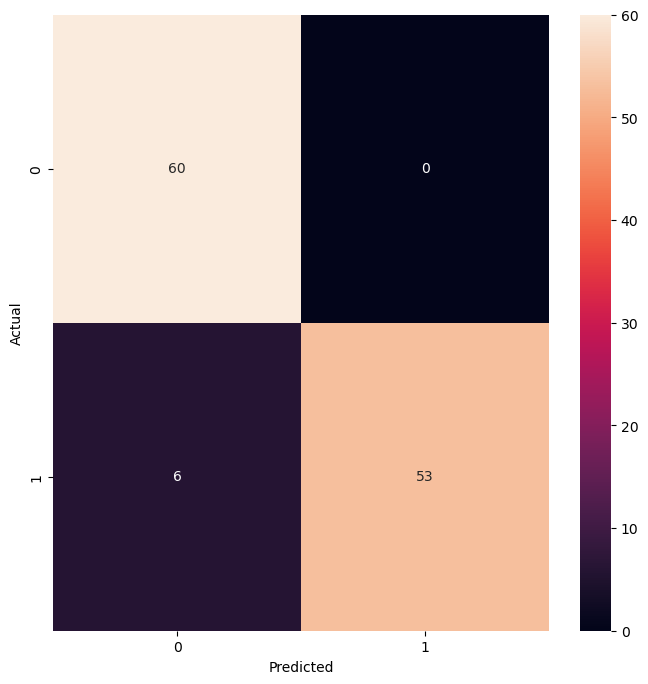

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

# Support Vector

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

Training sample error:  0.09803921568627451
Error on the test sample:  0.13445378151260504


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 